In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [14]:
img_gray = cv2.cvtColor(cv2.imread("../../img/1.png"), cv2.COLOR_BGR2GRAY)

In [15]:
def show(title, img):
 plt.figure(figsize=(4,4))
 plt.title(title)
 plt.imshow(img, cmap='gray')
 plt.axis("off")
 plt.show()

In [16]:
def _correlation(img, kernel):
  kh, kw = kernel.shape
  pad_h, pad_w = kh//2, kw//2
  padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
  out = np.zeros_like(img, dtype=np.float32)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      region = padded[i:i+kh, j:j+kw]
      out[i,j] = np.sum(region * kernel)
  return out


In [17]:
def correlation(img, kernel):
  if len(img.shape) == 3:
    r, g, b = cv2.split(img)
    cor_r = _correlation(r, kernel)
    cor_g = _correlation(g, kernel)
    cor_b = _correlation(b, kernel)
    return cv2.merge((cor_r, cor_g, cor_b))
  else:
    return _correlation(img, kernel)

In [18]:
def convolution(img, kernel):
 kernel_flipped = np.flipud(np.fliplr(kernel))
 return correlation(img, kernel_flipped)

# Lab 5

## Bài 1

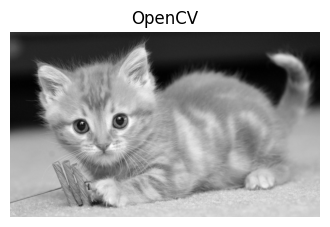

In [19]:
# Mean filter
kernel = np.ones((3, 3), np.float32)/9.0
outOpenCV = cv2.blur(img_gray, (3, 3))
show("OpenCV", outOpenCV)

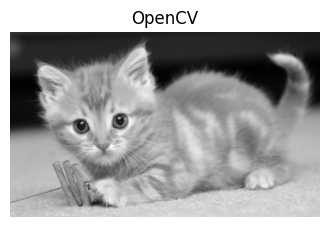

In [20]:
# Mean filter
kernel = np.ones((5, 5), np.float32)/25.0
outOpenCV = cv2.blur(img_gray, (5, 5))
show("OpenCV", outOpenCV)


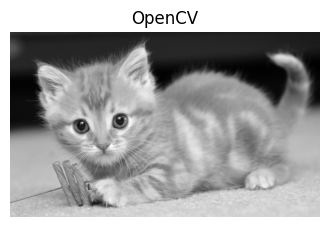

In [21]:
# Gaussian filter
kernel = np.array([[1, 2, 1,],
                    [2, 4, 2],
                    [1, 2, 1]])/16.0
outOpenCV = cv2.GaussianBlur(img_gray, (3, 3), sigmaX=1)
show("OpenCV", outOpenCV)


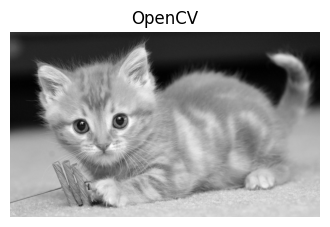

In [22]:
# Median filter
outOpenCV = cv2.medianBlur(img_gray, 3)
show("OpenCV", outOpenCV)

## Bài 2

(np.float64(-0.5), np.float64(1447.5), np.float64(863.5), np.float64(-0.5))

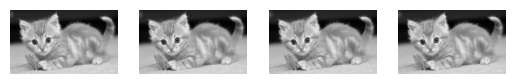

In [23]:
# Gaussian blur comparision with same sigma and different kernal
gau3 = cv2.GaussianBlur(img_gray, (3, 3), sigmaX=1)
gau5 = cv2.GaussianBlur(img_gray, (5, 5), sigmaX=1)
gau9 = cv2.GaussianBlur(img_gray, (9, 9), sigmaX=1)
gau15 = cv2.GaussianBlur(img_gray, (15, 15), sigmaX=1)

plt.subplot(2, 4, 1);
plt.imshow(gau3, cmap="gray");
plt.axis("off")

plt.subplot(2, 4, 2);
plt.imshow(gau5, cmap="gray");
plt.axis("off")

plt.subplot(2, 4, 3);
plt.imshow(gau9, cmap="gray");
plt.axis("off")

plt.subplot(2, 4, 4);
plt.imshow(gau15, cmap="gray");
plt.axis("off")


## Bài 3

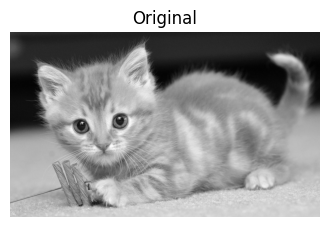

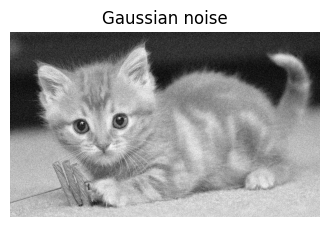

In [24]:
# Add Gaussian noise
def gauNoise(img_gray):

  mean = 0
  sigma = 25
  gaussianNoise = np.random.normal(mean, sigma, img_gray.shape).astype(np.float32)

  gaussianNoiseImg = img_gray.astype(np.float32) + gaussianNoise
  gaussianNoiseImg = np.clip(gaussianNoiseImg, 0, 255).astype(np.uint8)
  return gaussianNoiseImg

show("Original", img_gray)
show("Gaussian noise", gauNoise(img_gray))

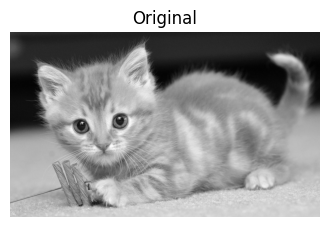

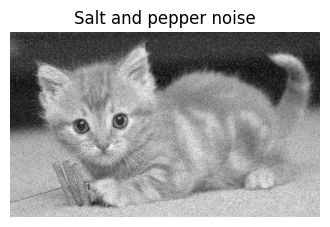

In [25]:
#salt and pepper noise
def saltAndPepperNoise(img, prob = 0.05):
  
  spNoiseImg = img.copy()
  rnd = np.random.rand(*img.shape)
  spNoiseImg[rnd < prob] = 0
  spNoiseImg[rnd > 1 - prob] = 255
  return spNoiseImg

show("Original", img_gray)
show("Salt and pepper noise", saltAndPepperNoise(img_gray))

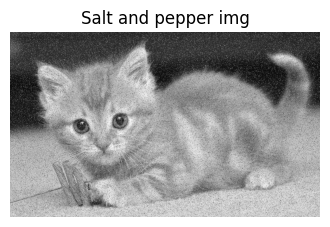

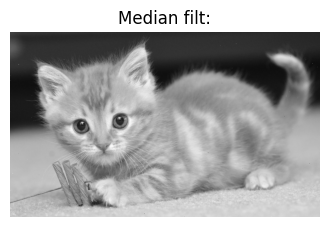

In [26]:
spImg = saltAndPepperNoise(img_gray)
# filtSpImgUsingGau = convolution(spImg, gauKernal3)
filtSpImgUsingMedian = cv2.medianBlur(spImg, 3)

show("Salt and pepper img", spImg)
# show("Gaussian filt:", filtSpImgUsingGau)
show("Median filt:", filtSpImgUsingMedian)

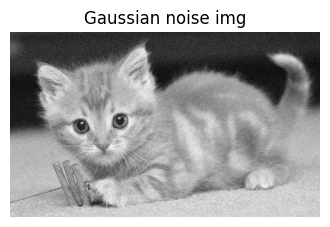

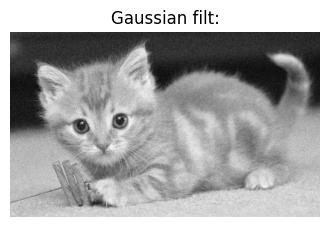

In [27]:
gauNoiseImg = gauNoise(img_gray)
filtGauImg = cv2.filter2D(gauNoiseImg, -1, kernel)

show("Gaussian noise img", gauNoiseImg)
show("Gaussian filt:", filtGauImg)

In [28]:
!pip install scikit-image
#Đánh giá bằng PSNR, SSIM
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

img_gray_uint8 = cv2.convertScaleAbs(img_gray)
filtGauImg_uint8 = cv2.convertScaleAbs(filtGauImg)


psnr = peak_signal_noise_ratio(img_gray_uint8, filtGauImg_uint8)
print(f"PSNR: {psnr:.4f}")

ssim = structural_similarity(img_gray_uint8, filtGauImg_uint8, data_range=255)
print(f"SSIM: {ssim:.4f}")

PSNR: 28.5147
SSIM: 0.5568


## Bài 4:

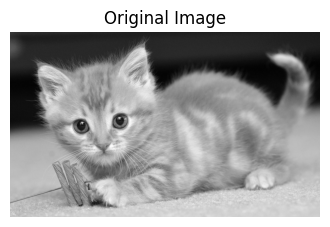

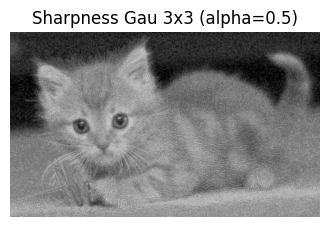

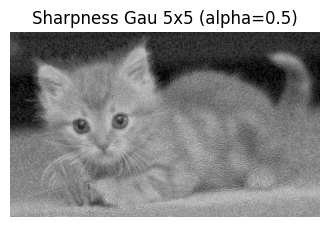

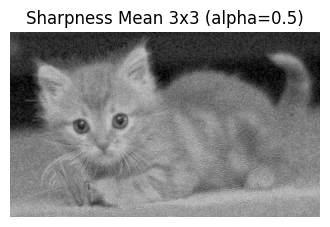

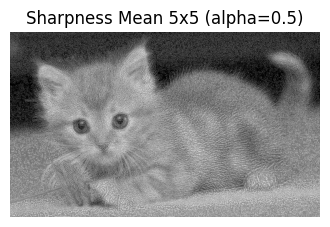

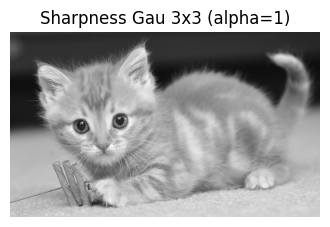

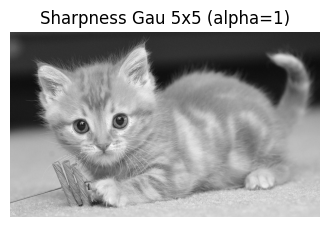

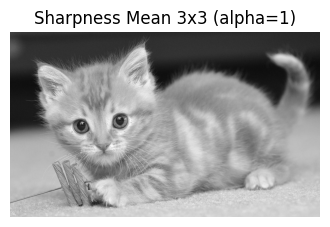

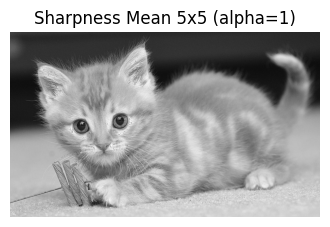

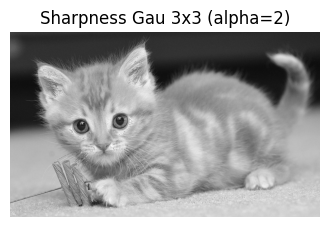

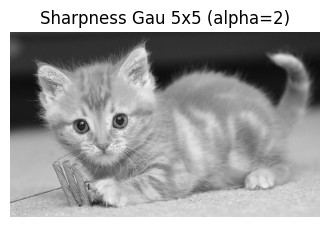

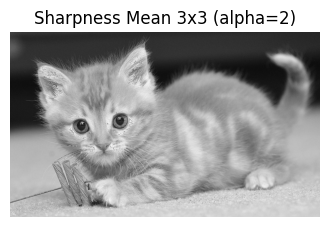

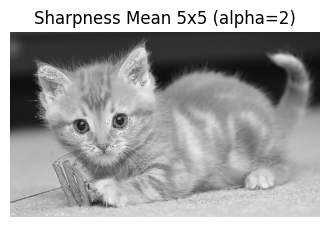

In [29]:
img_gau_blur_3 = cv2.GaussianBlur(img_gray, (3, 3), sigmaX=0)
img_gau_blur_5 = cv2.GaussianBlur(img_gray, (5, 5), sigmaX=0)

img_mean_blur_3 = cv2.blur(img_gray, (3, 3))
img_mean_blur_5 = cv2.blur(img_gray, (5, 5))

alpha_values = [0.5, 1, 2]

show("Original Image", img_gray)

for alpha in alpha_values:
  img_gau_sharp_3 = img_gray + alpha * (img_gray - img_gau_blur_3)
  img_gau_sharp_5 = img_gray + alpha * (img_gray - img_gau_blur_5)
  img_mean_sharp_3 = img_gray + alpha * (img_gray - img_mean_blur_3)
  img_mean_sharp_5 = img_gray + alpha * (img_gray - img_mean_blur_5)

  show(f"Sharpness Gau 3x3 (alpha={alpha})", img_gau_sharp_3)
  show(f"Sharpness Gau 5x5 (alpha={alpha})", img_gau_sharp_5)
  show(f"Sharpness Mean 3x3 (alpha={alpha})", img_mean_sharp_3)
  show(f"Sharpness Mean 5x5 (alpha={alpha})", img_mean_sharp_5)

## Bài 6

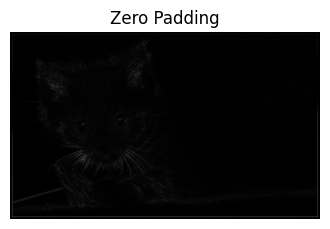

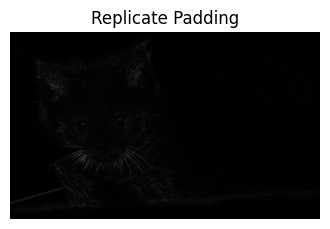

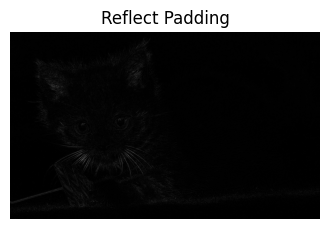

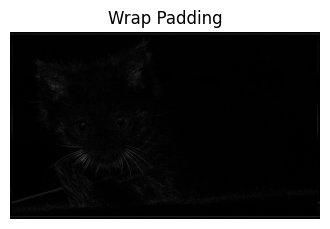

In [30]:
import numpy as np

pad_width = 10

img_pad_zero = np.pad(img_gray, pad_width, mode="constant")
img_pad_replicate = np.pad(img_gray, pad_width, mode='edge')
img_pad_reflect = np.pad(img_gray, pad_width, mode='reflect')
img_pad_wrap = np.pad(img_gray, pad_width, mode='wrap')

L = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
img_pad_zero = cv2.filter2D(img_pad_zero, ddepth = -1, kernel = L)
img_pad_replicate = cv2.filter2D(img_pad_replicate, ddepth = -1, kernel = L)
img_pad_reflect = cv2.filter2D(img_pad_reflect, ddepth = -1, kernel = L)
img_pad_wrap = cv2.filter2D(img_pad_wrap, ddepth = -1, kernel = L)
show("Zero Padding", img_pad_zero)
show("Replicate Padding", img_pad_replicate)
show("Reflect Padding", img_pad_reflect)
show("Wrap Padding", img_pad_wrap)


## Bài 7

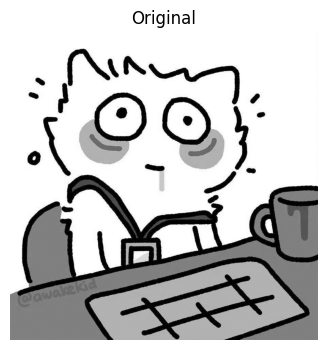

In [34]:
img = cv2.imread("../../img/4.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show("Original", img_gray)

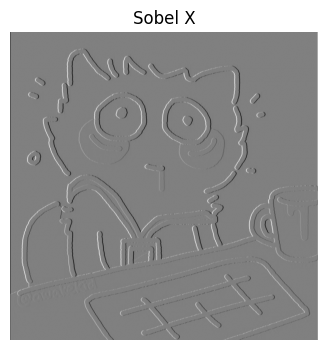

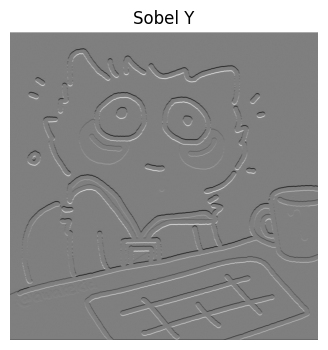

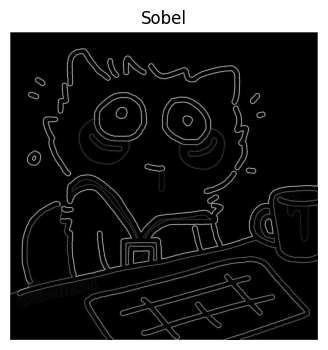

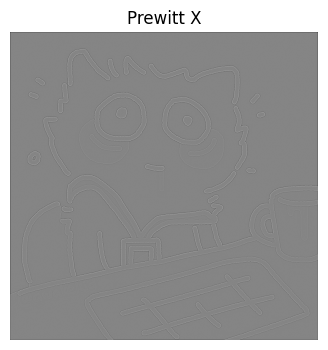

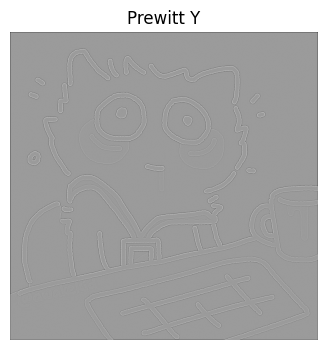

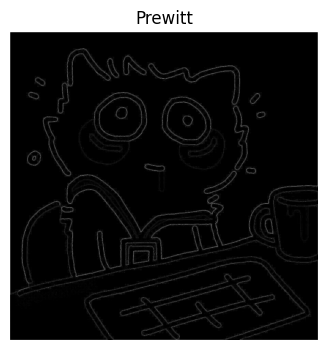

In [35]:
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Px = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
Py = np.array([[1, 0, 1], [0, -4, 0], [1, 0, 1]])

con_Sx = convolution(img_gray, Sx)
con_Sy = convolution(img_gray, Sy)
con_Px = convolution(img_gray, Px)
con_Py = convolution(img_gray, Py)
S = np.sqrt(con_Sx**2 + con_Sy**2)
P = np.sqrt(con_Px**2 + con_Py**2)

show("Sobel X", con_Sx)
show("Sobel Y", con_Sy)
show("Sobel", S)

show("Prewitt X", con_Px)
show("Prewitt Y", con_Py)
show("Prewitt", P)

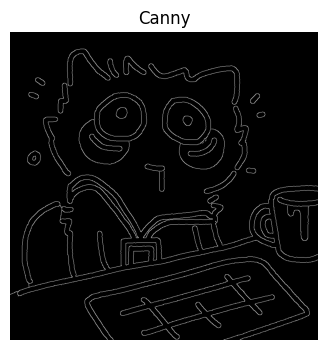

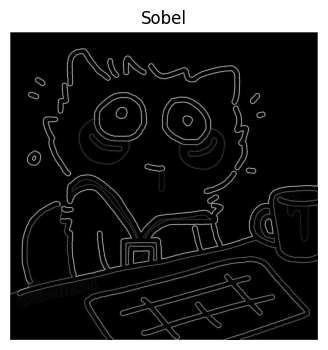

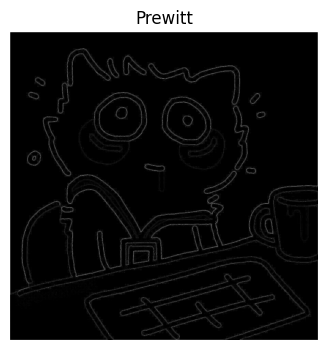

In [36]:
canny = cv2.Canny(img_gray, 100, 200)
# show canny, sobel and prewitt
show("Canny", canny)
show("Sobel", S)
show("Prewitt", P)

## Bài 8

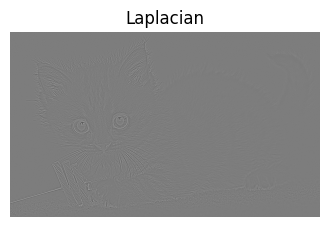

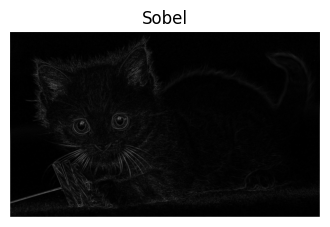

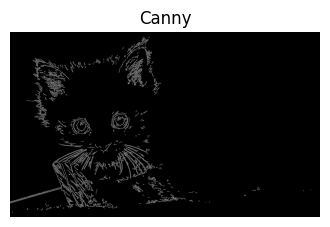

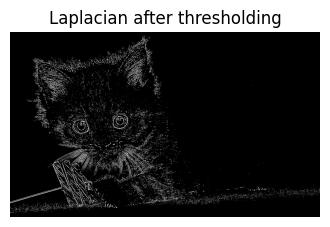

In [37]:
img_gray = cv2.cvtColor(cv2.imread("../../img/1.png"), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img_gray, (3, 3), 1.4)
laplacian = cv2.Laplacian(blur, cv2.CV_64F)

# Normalize
laplacian1 = laplacian/laplacian.max()
show("Laplacian", laplacian1)

# Sobel
con_Sx = convolution(img_gray, Sx)
con_Sy = convolution(img_gray, Sy)
S = np.sqrt(con_Sx**2 + con_Sy**2)
show("Sobel", S)

# Canny
canny = cv2.Canny(img_gray, 100, 200)
show("Canny", canny)

#Thresholding
clip = 0.1
laplacian1[laplacian1 < clip] = 0
laplacian1[laplacian1 >= clip] = 1
show("Laplacian after thresholding", laplacian1)

In [38]:
def show3Types(img_them):
    # Sobel
    con_Sx = convolution(img_them, Sx)
    con_Sy = convolution(img_them, Sy)
    S = np.sqrt(con_Sx**2 + con_Sy**2)
    show("Sobel", S)

    # Laplacian
    blur = cv2.GaussianBlur(img_them, (3, 3), 1.4)
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)
    laplacian1 = laplacian/laplacian.max()
    laplacian1[laplacian1 < clip] = 0
    laplacian1[laplacian1 >= clip] = 1
    show("Laplacian", laplacian1)

    # Canny
    canny = cv2.Canny(img_them, 100, 200)
    show("Canny", canny)

## Bài 9

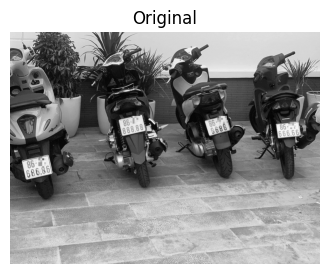

In [41]:
img_bien_so = cv2.imread("../../img/xe.jpeg")
img_bien = cv2.cvtColor(img_bien_so, cv2.COLOR_BGR2GRAY)
show("Original", img_bien)

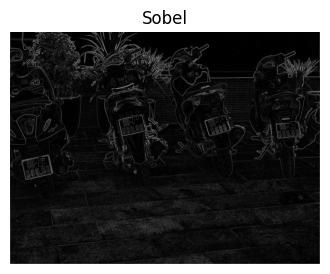

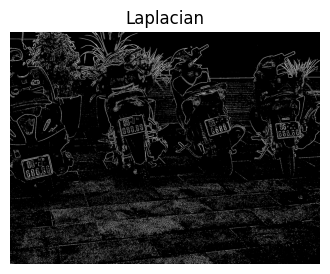

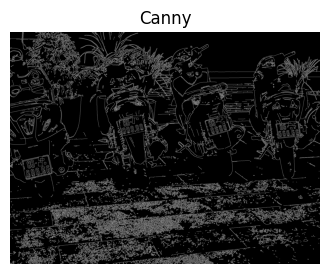

In [42]:
show3Types(img_bien)

 Canny tốt nhất và chi tiết nh trong 3 cách, Laplacian phát hiện cả biên phần ngoài, còn Sobel tệ nhất

## Bài 10

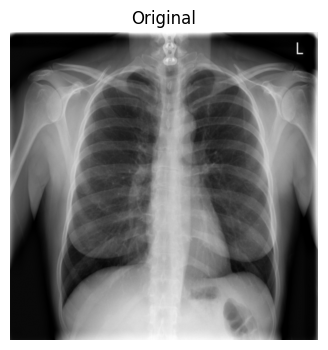

In [52]:
img_hand = cv2.cvtColor(cv2.imread("../../img/chest.png"), cv2.COLOR_BGR2GRAY)
img_hand = cv2.GaussianBlur(img_hand, (5, 5), 1)
show("Original", img_hand)

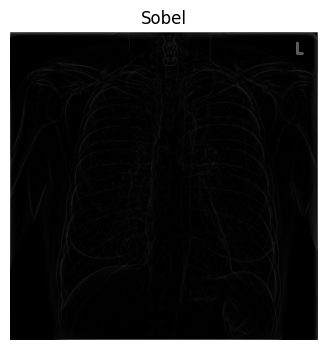

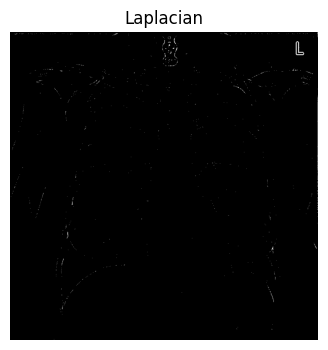

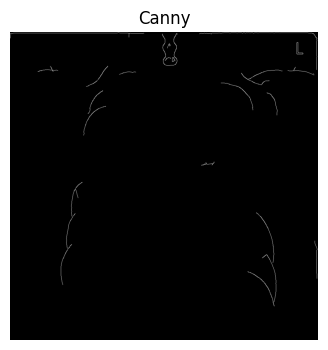

In [53]:
# Sobel
con_Sx = convolution(img_hand, Sx)
con_Sy = convolution(img_hand, Sy)
S = np.sqrt(con_Sx**2 + con_Sy**2)
show("Sobel", S)

# Laplacian
blur = cv2.GaussianBlur(img_hand, (3, 3), 1.4)
laplacian = cv2.Laplacian(blur, cv2.CV_64F)
laplacian1 = laplacian/laplacian.max()
laplacian1[laplacian1 < clip] = 0
laplacian1[laplacian1 >= clip] = 1
show("Laplacian", laplacian1)

# Canny
canny = cv2.Canny(img_hand, 50, 150)
show("Canny", canny)

 cho kết quả tệ nhất, Sobel được đánh giá cao, còn Laplacian hơi nhiều hột và nhiễu

## Bài 11

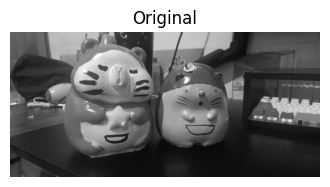

In [54]:
img_chandung = cv2.cvtColor(cv2.imread("../../img/3.jpg"), cv2.COLOR_BGR2GRAY)
show("Original", img_chandung)

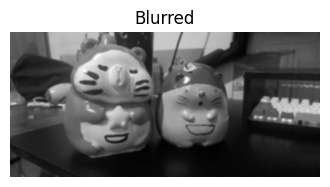

In [55]:
# Mô phỏng ảnh suy giảm
img_chandung = cv2.GaussianBlur(img_chandung, (9, 9), 5)
show("Blurred", img_chandung)

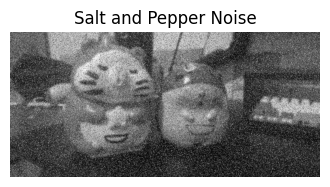

In [56]:
# Thêm nhiễu muối tiêu
img_chandung_sp = saltAndPepperNoise(img_chandung, prob=0.1)
show("Salt and Pepper Noise", img_chandung_sp)

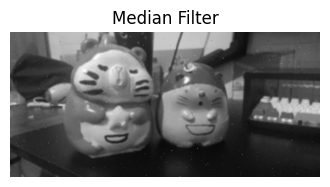

In [57]:
# Median filter
filt_chandung_sp = cv2.medianBlur(img_chandung_sp, 3)
show("Median Filter", filt_chandung_sp)

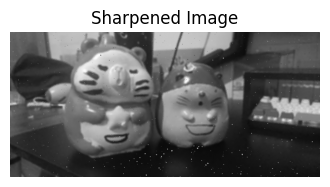

In [58]:
# Dùng Sharpening để làm nét ảnh
img_sharp = filt_chandung_sp + 1 * (filt_chandung_sp - cv2.GaussianBlur(filt_chandung_sp, (5, 5), 0))
show("Sharpened Image", img_sharp)

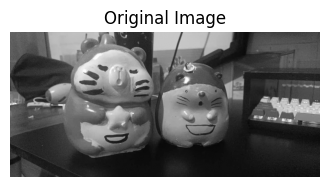

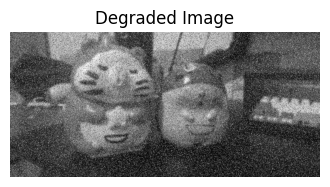

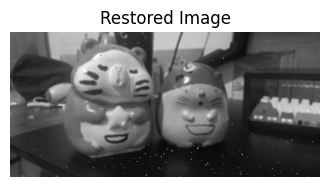

In [60]:
# Show ảnh gốc, suy giảm và phục hồi:
show("Original Image", cv2.cvtColor(cv2.imread("../../img/3.jpg"), cv2.COLOR_BGR2GRAY))
show("Degraded Image", img_chandung_sp)
show("Restored Image", img_sharp)

In [62]:
# in metrics PSNR và SSIM giữa ảnh gốc và ảnh phục hồi
img_original = cv2.cvtColor(cv2.imread("../../img/3.jpg"), cv2.COLOR_BGR2GRAY)
psnr = peak_signal_noise_ratio(img_original, img_sharp)
ssim = structural_similarity(img_original, img_sharp, data_range=255)
print(f"PSNR: {psnr:.4f}")
print(f"SSIM: {ssim:.4f}")


PSNR: 27.1674
SSIM: 0.7900


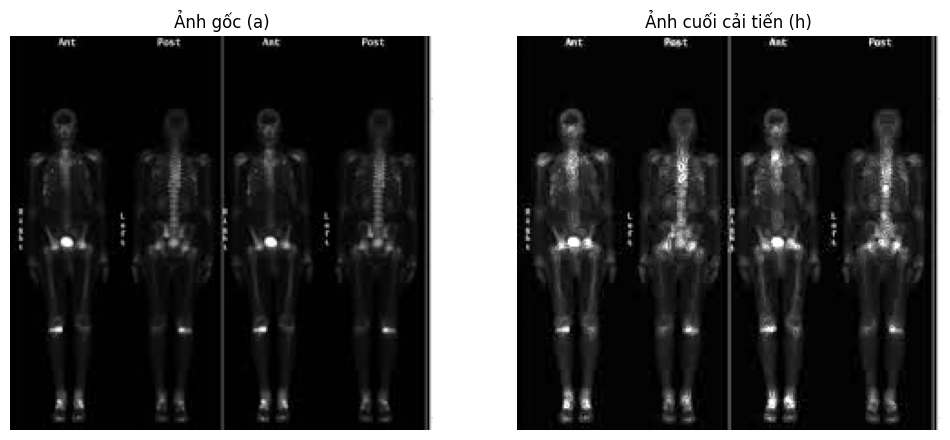

In [4]:

# Đọc ảnh gốc
img = cv2.imread("../../img/bone.jpg", 0)

# Bước (a): ảnh gốc
a = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# Bước (b): Laplacian filter
laplacian = cv2.Laplacian(a, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

# Sharpened: (a) - (b)
sharpened = cv2.subtract(a, laplacian)

# Bước (c): Sobel filter
sobelx = cv2.Sobel(sharpened, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(sharpened, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

# Bước (d): smoothing bằng Gaussian 5x5
smoothed = cv2.GaussianBlur(sobel, (5, 5), 0)

# Bước (e): product giữa (c) và (d), chuẩn hóa kết quả
product = cv2.multiply(sobel, smoothed, scale=1/255.0)
product = cv2.normalize(product, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Bước (f): sum của (a) và (product), rồi chuẩn hóa
f = cv2.addWeighted(a, 1, product, 1, 0)
f = cv2.normalize(f, None, 0, 255, cv2.NORM_MINMAX)

# Bước (g): Power-law transform (gamma correction)
gamma = 0.8  # nhẹ hơn để không mất chi tiết
g = np.array(255 * (f / 255) ** gamma, dtype='uint8')

# Ảnh cuối (h)
final_img = g.copy()

# Hiển thị kết quả
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Ảnh gốc (a)")
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Ảnh cuối cải tiến (h)")
plt.imshow(final_img, cmap='gray')
plt.axis('off')
plt.show()

